# Sea Breeze Analysis Project Preprocessing
Jacob Brand, Rachael Dewey, Forrest Johnson, Rohith Bakkannagari, and Joshua Allard

<hr>

**Introduction to Problem/Opportunity:**
In his presentation on research into shark presence and attacks., Joe Merchant asserted that there is a relationship between the occurrence of sea breezes and shark presence at the shoreline. However, there is a lack of available data on when sea breezes have occurred. Based on the existing Carolina coast weather data that has been collected for the past ten years, we aim to create a model that helps to predict the conditions that are most viable for creating a sea breeze utilizing two sets of data from onshore weather stations and data from an offshore weather buoy.

Some features we plan to look into include, but are not limited to:
- Wind speed,
- Wind direction,
- Seawater and land temperature,
- Alpha vector (Wind measurement), and
- Cloud cover

**Research Question:**
Using buoy and coastal weather station data from within the last ten years, do various coastal weather phenomena such as sea and land temperature and turbidity accurately predict the presence of a sea breeze on the Carolina coast?

**Data Resources:**
- Weather Station Data: https://mesonet.agron.iastate.edu/request/download.phtml?network=SC_ASOS
    -  For weather station data we used the METAR data collected from Iowa State University which contained datasets for multiple years from weather stations across the United             States. We focused on two weather stations off of North and South Carolina. **Station HXD** located at Hilton Head Island in South Carolina and **Station SUT** located             near Wilmington North Carolina.
- Weather Buoy Data:  https://www.ndbc.noaa.gov/station_page.php?station=41033
    -  For the buoy data we went to the National Data Buoy Center (NDBC) and collected data over the past 8 years from a buoy off of South Carolina's coastline. 

## Buoy Data

The first data we collected for the calculation of Sea Breeze was from Station 41033 - Fripp Nearshore, SC. We have called it "Buoy Data," as it was collected from an offshore buoy. 

This data was suggested to us by meteorologist Joe Merchant because it includes important air and water temperature data, which the difference between which is a significant indicator of a sea breeze. The buoy data was collected from the last 10 years and includes the columns Year (**"YY"**), Month (**"MM"**), Day (**"DD"**), Minute (**"mm"**), Hour (**"hh"**), Wind Direction (**"WDIR"**), Wind Speed (**"WSPD"**), Gust (**"GST"**), Air Pressure (**"PRES"**), Air Temperature (**"ATMP"**), and Water Temperature (**"WTMP"**). 

In [ ]:
# import libraries
import pandas as pd
import numpy as np

Upon reading the original csv, we parsed the Year (**"YY"**), Month (**"MM"**) , and Day (**"DD"**) columns to a single **"date"** column. We also dropped the Minute (**"mm"**) column.

This also displays the head and tail of our initial dataset.

In [ ]:
buoy = pd.read_csv('https://raw.githubusercontent.com/Forrestjohnson2000/6162-Seabreeze/main/Data/Buoy.csv', parse_dates = {"date" : ["#YY","MM","DD"]} )

#We drop the minutes column since this level of granularity is not necessary for our analysis
buoy = buoy.drop(["mm"], axis=1)
buoy

,date,hh,WDIR,WSPD,GST,PRES,ATMP,WTMP
0,2020-01-01,0,257,5.3,7.1,1016.2,13.9,13.8
1,2020-01-01,1,255,5.9,8.4,1016.4,13.7,13.7
2,2020-01-01,2,254,7.4,9.2,1016.6,13.5,13.6
3,2020-01-01,3,257,7.8,10.1,1016.8,13.2,13.6
4,2020-01-01,4,260,7.8,10.1,1016.7,12.8,13.6
...,...,...,...,...,...,...,...,...
75762,2010-12-31,18,60,4.0,99.0,1022.8,9.6,999.0
75763,2010-12-31,20,70,4.0,99.0,1022.2,10.1,999.0
75764,2010-12-31,21,80,3.0,99.0,1022.2,10.4,999.0
75765,2010-12-31,22,80,3.0,99.0,1022.4,11.1,999.0


Checking the data types of each column of the imported data, all of which seem correct.

In [ ]:
buoy.dtypes

date    datetime64[ns]
hh               int64
WDIR             int64
WSPD           float64
GST            float64
PRES           float64
ATMP           float64
WTMP           float64
dtype: object

Next, we can examine the summary of each variable.

In [ ]:
buoy.describe()

,hh,WDIR,WSPD,GST,PRES,ATMP,WTMP
count,75767.000000,75767.000000,75767.000000,75767.000000,75767.000000,75767.000000,75767.000000
mean,11.494846,175.703670,5.568113,31.143432,2185.523770,41.736301,554.183938
std,6.920052,118.410601,4.124480,40.339431,3021.123983,144.280182,486.641218
min,0.000000,0.000000,0.000000,0.000000,991.900000,-5.900000,5.500000
25%,6.000000,75.000000,3.600000,5.600000,1014.400000,14.500000,24.400000
50%,11.000000,190.000000,5.100000,8.700000,1018.200000,21.200000,999.000000
75%,17.000000,243.000000,7.000000,99.000000,1023.200000,26.900000,999.000000
max,23.000000,999.000000,99.000000,99.000000,9999.000000,999.000000,999.000000


We make the assumption that the values 99, 999, and 9999 represent missing data. We replace these with null values, "nan".

In [ ]:
#replacing values with na as 99, 999, 9999 are missing data
buoy["WDIR"].replace({999.0:np.nan}, inplace=True)
buoy["GST"].replace({99.0:np.nan}, inplace=True)
buoy["PRES"].replace({9999.0:np.nan}, inplace=True)
buoy["ATMP"].replace({999.0:np.nan}, inplace=True)
buoy["WTMP"].replace({999.0:np.nan}, inplace=True)
buoy["WSPD"].replace({99.0:np.nan}, inplace=True)

We recheck the data to see current statistics for each variable that was skewed by the 99/999/9999 values.

In [ ]:
buoy[["GST", "WDIR", "PRES", "ATMP", "WTMP", "WSPD"]].describe()

,GST,WDIR,PRES,ATMP,WTMP,WSPD
count,56064.000000,75296.000000,65913.000000,74088.000000,34490.000000,75680.000000
mean,7.296079,170.553695,1017.408303,20.042562,21.836225,5.460706
std,3.496994,99.208078,5.594077,7.141285,6.584634,2.642720
min,0.000000,0.000000,991.900000,-5.900000,5.500000,0.000000
25%,4.900000,74.000000,1013.900000,14.300000,15.400000,3.600000
50%,7.000000,190.000000,1017.300000,20.900000,23.200000,5.100000
75%,9.500000,240.000000,1020.800000,26.700000,28.300000,7.000000
max,40.700000,360.000000,1041.300000,33.700000,31.900000,30.300000


By calculating the total number of null values for each variable, we can see that there is significant data loss in some categories. WDIR, GST, PRES, ATMP, WTMP all have missing values, especially GST, PRES, and WTMP. We will need to handle that lost data.

In [ ]:
print(buoy.isnull().sum())
print(buoy.info())

date        0
hh          0
WDIR      471
WSPD       87
GST     19703
PRES     9854
ATMP     1679
WTMP    41277
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75767 entries, 0 to 75766
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    75767 non-null  datetime64[ns]
 1   hh      75767 non-null  int64         
 2   WDIR    75296 non-null  float64       
 3   WSPD    75680 non-null  float64       
 4   GST     56064 non-null  float64       
 5   PRES    65913 non-null  float64       
 6   ATMP    74088 non-null  float64       
 7   WTMP    34490 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 4.6 MB
None


We utilize a SimpleImputer to impute the mean for the missing data for the variables with missing data.

In [ ]:
#import impute library
from sklearn.impute import SimpleImputer

In [ ]:
#impute the mean into the missing data
buoy_mean = buoy.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
buoy_mean.iloc[:,3:] = mean_imputer.fit_transform(buoy_mean.iloc[:,3:])
buoy_mean[["GST", "WDIR", "PRES", "ATMP", "WTMP", "WSPD"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75767 entries, 0 to 75766
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GST     75767 non-null  float64
 1   WDIR    75296 non-null  float64
 2   PRES    75767 non-null  float64
 3   ATMP    75767 non-null  float64
 4   WTMP    75767 non-null  float64
 5   WSPD    75767 non-null  float64
dtypes: float64(6)
memory usage: 3.5 MB


We visualize by creating a histogram for each variable. We can ignore the hour distrubution. From the histograms, we can see that Wind Speed (**"WSPD"**), Wind Direction (**"WDIR"**), and Air Temperature (**"ATMP"**) are not normally distributed. Pressure (**"PRES"**) and Gust (**"GST"**) do appear to be normally distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7179214c10>,
      dtype=object)

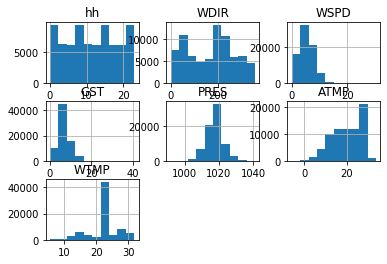

In [ ]:
import matplotlib.pyplot as plt
buoy_mean.hist()

We also create a scatter matrix of all variables. Based on this, there does not appear to be many strong correlations between variables except for Gust (**"GST"**) and Wind Speed (**"WSPD"**). This makes intuitive sense, as high wind speeds create gusts, so these variables are positively correlated.

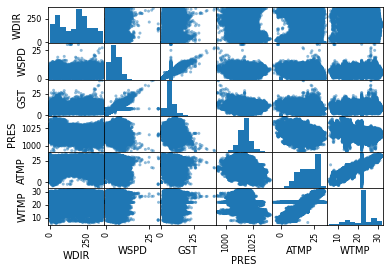

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(buoy_mean[["WDIR", "WSPD", "GST", "PRES", "ATMP", "WTMP"]])
plt.show()

The below figure is a correlation heatmap. What we take from this is that windspeed and gust are highly correlated at .84, air temp and water temp are fairly correlated at .64, and month and air temp are somewhat positively correlated at .32.

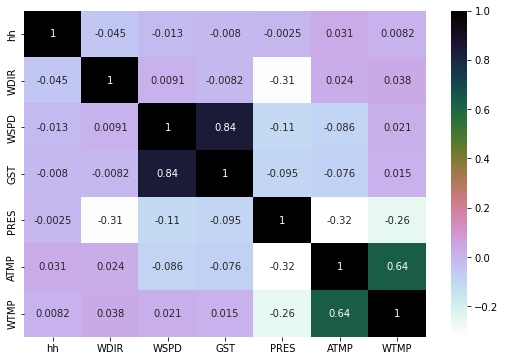

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(buoy_mean.corr(),annot=True,cmap='cubehelix_r')
plt.show()

## Weather Station Data

For weather station data we used the METAR data collected from Iowa State University which contained datasets for multiple years from weather stations across the United States. We focused on two weather stations off of North and South Carolina, Station HXD located at Hilton Head Island in South Carolina and Station SUT located near Wilmington North Carolina. 

This data was collected over the last 8 years and includes the columns Weather Station (**"station"**), the timestamp for when the data was recorded (**"valid"**), Temperature in Celsius (**"tmpc"**), Dew Point in Celsius (**"dwpc"**), Relative Humidity (%) (**"relh"**), Real Feel Temperature in Farenheit (**"feel"**), Wind Direction in degrees from True North (**"drct"**), Wind Speed in mph (**"sped"**), Precipitation in mm (**"p01m"**), Wind Gust in mph (**"gust_mph"**), Sky Level 1 and 2 Cloud Coverage (**"skyc1" and "skyc2"**), and lastly Cloud Height Level 1 and 2 (**"skyl1" and "skyl2"**).




In [ ]:
#import libraries
import pandas as pd
import numpy as np
import datetime as dt

We collected our weather station data from two different weather stations. Uploading both datasets separately as their own dataframes.

In [ ]:
#read both datasets into dataframes
stationHXD_data = pd.read_csv("HXD.csv")
stationSUT_data = pd.read_csv("SUT.csv")

To gain an understanding of what each column was read in as. A few notable takeaways are that the variable **mslp**, the measurement of sea level pressure, has all null values, and therefore provides no insight to the dataframe. Additionally, some of the other columns such as **gust_mph** and the cloud coverage and height variables seem to have a significantly lower number of non-null values, which we will dig into later.

In [ ]:
stationHXD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135986 entries, 0 to 135985
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   station   135986 non-null  object 
 1   valid     135986 non-null  object 
 2   tmpc      134741 non-null  float64
 3   dwpc      134689 non-null  float64
 4   relh      133716 non-null  float64
 5   feel      133662 non-null  float64
 6   drct      125745 non-null  float64
 7   sped      134471 non-null  float64
 8   mslp      0 non-null       float64
 9   p01m      102018 non-null  float64
 10  gust_mph  23535 non-null   float64
 11  skyc1     134665 non-null  object 
 12  skyc2     23426 non-null   object 
 13  skyl1     62225 non-null   float64
 14  skyl2     23418 non-null   float64
dtypes: float64(11), object(4)
memory usage: 15.6+ MB


The following code blocks examine the initial HXD weather station dataset further.

In [ ]:
stationHXD_data.head(10)

,station,valid,tmpc,dwpc,relh,feel,drct,sped,mslp,p01m,gust_mph,skyc1,skyc2,skyl1,skyl2
0,HXD,2013-01-01 00:55,8.0,7.0,93.40,46.4,0.0,0.0,NaN,0.0,NaN,CLR,NaN,NaN,NaN
1,HXD,2013-01-01 01:15,7.0,7.0,100.00,44.6,0.0,0.0,NaN,NaN,NaN,CLR,NaN,NaN,NaN
2,HXD,2013-01-01 01:35,6.0,6.0,100.00,42.8,0.0,0.0,NaN,NaN,NaN,CLR,NaN,NaN,NaN
3,HXD,2013-01-01 01:50,8.0,6.0,87.19,46.4,0.0,0.0,NaN,0.0,NaN,CLR,NaN,NaN,NaN
4,HXD,2013-01-01 01:55,6.0,6.0,100.00,42.8,0.0,0.0,NaN,NaN,NaN,CLR,NaN,NaN,NaN
5,HXD,2013-01-01 02:15,6.0,6.0,100.00,42.8,0.0,0.0,NaN,NaN,NaN,CLR,NaN,NaN,NaN
6,HXD,2013-01-01 02:35,6.0,6.0,100.00,42.8,0.0,0.0,NaN,NaN,NaN,SCT,NaN,10000.0,NaN
7,HXD,2013-01-01 02:55,7.0,7.0,100.00,44.6,0.0,0.0,NaN,NaN,NaN,OVC,NaN,10000.0,NaN
8,HXD,2013-01-01 03:15,7.0,7.0,100.00,44.6,0.0,0.0,NaN,NaN,NaN,OVC,NaN,10000.0,NaN
9,HXD,2013-01-01 03:35,8.0,8.0,100.00,46.4,0.0,0.0,NaN,NaN,NaN,OVC,NaN,11000.0,NaN


In [ ]:
stationHXD_data.describe()

,tmpc,dwpc,relh,feel,drct,sped,mslp,p01m,gust_mph,skyl1,skyl2
count,134741.000000,134689.000000,133716.000000,133662.000000,125745.00000,134471.000000,0.0,102018.000000,23535.000000,62225.000000,23418.000000
mean,19.399834,15.627512,80.810257,68.114444,135.19868,6.094533,NaN,0.036316,19.264642,3340.750502,4865.432573
std,7.460614,8.445747,16.419162,16.323162,119.88580,5.073781,NaN,0.804315,5.838428,3950.943271,4614.486380
min,-7.000000,-62.000000,1.040000,7.170000,0.00000,0.000000,NaN,0.000000,11.500000,0.000000,500.000000
25%,14.000000,10.000000,71.830000,57.200000,10.00000,3.450000,NaN,0.000000,16.100000,1100.000000,2300.000000
50%,21.000000,18.000000,83.660000,69.800000,150.00000,5.750000,NaN,0.000000,18.400000,2200.000000,3400.000000
75%,25.000000,23.000000,93.880000,78.800000,220.00000,9.200000,NaN,0.000000,21.850000,4000.000000,5500.000000
max,52.000000,37.000000,100.000000,185.240000,360.00000,468.050000,NaN,113.030000,217.350000,105500.000000,75800.000000


We begin to examine the SUT dataset.

In [ ]:
stationSUT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224994 entries, 0 to 224993
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   station   224994 non-null  object 
 1   valid     224994 non-null  object 
 2   tmpc      224475 non-null  float64
 3   dwpc      224475 non-null  float64
 4   relh      224330 non-null  float64
 5   feel      224330 non-null  float64
 6   drct      224967 non-null  float64
 7   sped      224967 non-null  float64
 8   mslp      0 non-null       float64
 9   p01m      224994 non-null  float64
 10  gust_mph  40555 non-null   float64
 11  skyc1     221521 non-null  object 
 12  skyc2     44850 non-null   object 
 13  skyl1     90160 non-null   float64
 14  skyl2     44850 non-null   float64
dtypes: float64(11), object(4)
memory usage: 25.7+ MB


We convert the **"valid"** column to the datetime format for both datasets as this is the timestamp of when the data was recorded and this format will be easier to manipulate.

In [ ]:
stationHXD_data.valid = pd.to_datetime(stationHXD_data.valid)
stationSUT_data.valid = pd.to_datetime(stationSUT_data.valid)

The following code blocks examine the SUT dataset further

In [ ]:
stationSUT_data.head(10)

,station,valid,tmpc,dwpc,relh,feel,drct,sped,mslp,p01m,gust_mph,skyc1,skyc2,skyl1,skyl2
0,SUT,2013-01-01 00:15:00,5.0,2.7,85.07,41.00,0.0,0.00,NaN,0.0,NaN,SCT,SCT,4000.0,4900.0
1,SUT,2013-01-01 00:35:00,4.6,2.8,88.10,40.28,0.0,0.00,NaN,0.0,NaN,SCT,NaN,4700.0,NaN
2,SUT,2013-01-01 00:55:00,4.7,2.7,86.86,40.46,0.0,0.00,NaN,0.0,NaN,SCT,SCT,3900.0,4700.0
3,SUT,2013-01-01 01:15:00,4.9,3.2,88.75,40.82,0.0,0.00,NaN,0.0,NaN,CLR,NaN,NaN,NaN
4,SUT,2013-01-01 01:35:00,5.8,3.6,85.76,42.44,0.0,0.00,NaN,0.0,NaN,CLR,NaN,NaN,NaN
5,SUT,2013-01-01 01:55:00,6.5,4.1,84.63,43.70,0.0,0.00,NaN,0.0,NaN,SCT,NaN,11000.0,NaN
6,SUT,2013-01-01 02:15:00,7.6,5.6,87.15,44.33,210.0,3.45,NaN,0.0,NaN,SCT,NaN,11000.0,NaN
7,SUT,2013-01-01 02:35:00,9.5,6.6,82.10,47.39,230.0,4.60,NaN,0.0,NaN,SCT,NaN,10000.0,NaN
8,SUT,2013-01-01 02:55:00,10.1,7.4,83.31,50.18,230.0,5.75,NaN,0.0,NaN,SCT,NaN,10000.0,NaN
9,SUT,2013-01-01 03:15:00,10.5,7.8,83.36,50.90,220.0,5.75,NaN,0.0,NaN,SCT,NaN,10000.0,NaN


In [ ]:
stationSUT_data.dtypes

station             object
valid       datetime64[ns]
tmpc               float64
dwpc               float64
relh               float64
feel               float64
drct               float64
sped               float64
mslp               float64
p01m               float64
gust_mph           float64
skyc1               object
skyc2               object
skyl1              float64
skyl2              float64
dtype: object

We address the issue of missing values, starting with the HXD station data. We removed **mslp** because it contained all null values then reevaluated the rest of the data with missing values.

In [ ]:
#Drop column with all null values
stationHXD_data = stationHXD_data.drop(labels = "mslp", axis = 1)
stationHXD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135986 entries, 0 to 135985
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   station   135986 non-null  object        
 1   valid     135986 non-null  datetime64[ns]
 2   tmpc      134741 non-null  float64       
 3   dwpc      134689 non-null  float64       
 4   relh      133716 non-null  float64       
 5   feel      133662 non-null  float64       
 6   drct      125745 non-null  float64       
 7   sped      134471 non-null  float64       
 8   p01m      102018 non-null  float64       
 9   gust_mph  23535 non-null   float64       
 10  skyc1     134665 non-null  object        
 11  skyc2     23426 non-null   object        
 12  skyl1     62225 non-null   float64       
 13  skyl2     23418 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 14.5+ MB


To get a better understanding of the null values in the dataset, we caclulated the proportion and percent of null values out of the total number of row values present. From this we can directly see how prevalent null values are in each variable of the dataset. 

In [ ]:
#We look at the proportion of null values in each of the remaining columns.
stationHXD_data.isnull().sum()

proportion = stationHXD_data.isnull().sum()/len(stationHXD_data.index)
pct = round(proportion*100, 3)
print(pct)

station      0.000
valid        0.000
tmpc         0.916
dwpc         0.954
relh         1.669
feel         1.709
drct         7.531
sped         1.114
p01m        24.979
gust_mph    82.693
skyc1        0.971
skyc2       82.773
skyl1       54.242
skyl2       82.779
dtype: float64


Because **p01m**, **gust_mph**, **skyc2**, and **skyl1/skyl2** have a significant percentage of null values, *over about 20%*, we remove them from the analysis. This also takes into consideration the fact that precipitation and cloud coverage are not considered to have a large impact on the presence of sea breeze, *according to Joe Merchant*. On the other hand, wind gust is highly correlated to wind speed, so removing **gust_mph** will not impact the overall analysis.

In [ ]:
#Drop the variables with na's over 50% of the data, then reexamine the data.
stationHXD_data = stationHXD_data.drop(labels = ["p01m", "gust_mph", "skyc2", "skyl1"], axis = 1)

stationHXD_data.head()

,station,valid,tmpc,dwpc,relh,feel,drct,sped,skyc1,skyl2
0,HXD,2013-01-01 00:55:00,8.0,7.0,93.40,46.4,0.0,0.0,CLR,NaN
1,HXD,2013-01-01 01:15:00,7.0,7.0,100.00,44.6,0.0,0.0,CLR,NaN
2,HXD,2013-01-01 01:35:00,6.0,6.0,100.00,42.8,0.0,0.0,CLR,NaN
3,HXD,2013-01-01 01:50:00,8.0,6.0,87.19,46.4,0.0,0.0,CLR,NaN
4,HXD,2013-01-01 01:55:00,6.0,6.0,100.00,42.8,0.0,0.0,CLR,NaN


Now we do the same for the SUT station data.

In [ ]:
stationSUT_data.isnull().sum()

station          0
valid            0
tmpc           519
dwpc           519
relh           664
feel           664
drct            27
sped            27
mslp        224994
p01m             0
gust_mph    184439
skyc1         3473
skyc2       180144
skyl1       134834
skyl2       180144
dtype: int64

In [ ]:
#We look at the proportion of null values in each column.
proportion = stationSUT_data.isnull().sum()/len(stationSUT_data.index)
pct = round(proportion*100, 3)
print(pct)

station       0.000
valid         0.000
tmpc          0.231
dwpc          0.231
relh          0.295
feel          0.295
drct          0.012
sped          0.012
mslp        100.000
p01m          0.000
gust_mph     81.975
skyc1         1.544
skyc2        80.066
skyl1        59.928
skyl2        80.066
dtype: float64


In [ ]:
#Drop variables with na's greater than 50% of the data
stationSUT_data = stationSUT_data.drop(labels = ["gust_mph", "skyc2", "skyl1", "mslp"], axis = 1)

stationSUT_data.head()

,station,valid,tmpc,dwpc,relh,feel,drct,sped,p01m,skyc1,skyl2
0,SUT,2013-01-01 00:15:00,5.0,2.7,85.07,41.00,0.0,0.0,0.0,SCT,4900.0
1,SUT,2013-01-01 00:35:00,4.6,2.8,88.10,40.28,0.0,0.0,0.0,SCT,NaN
2,SUT,2013-01-01 00:55:00,4.7,2.7,86.86,40.46,0.0,0.0,0.0,SCT,4700.0
3,SUT,2013-01-01 01:15:00,4.9,3.2,88.75,40.82,0.0,0.0,0.0,CLR,NaN
4,SUT,2013-01-01 01:35:00,5.8,3.6,85.76,42.44,0.0,0.0,0.0,CLR,NaN


Impute the missing values for the remaining columns using mean or mode.

In [ ]:
##Impute missing values of variables tmpc, dwpc, relh, feel, drct, and sped using mean
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy="mean")
stationHXD_data.loc[:,["tmpc", "dwpc", "relh", "feel", "drct", "sped"]] = mean_imputer.fit_transform(stationHXD_data[["tmpc", "dwpc", "relh", "feel", "drct", "sped"]])
stationSUT_data.loc[:,["tmpc", "dwpc", "relh", "feel", "drct", "sped"]] = mean_imputer.fit_transform(stationSUT_data[["tmpc", "dwpc", "relh", "feel", "drct", "sped"]])
stationHXD_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135986 entries, 0 to 135985
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   station  135986 non-null  object        
 1   valid    135986 non-null  datetime64[ns]
 2   tmpc     135986 non-null  float64       
 3   dwpc     135986 non-null  float64       
 4   relh     135986 non-null  float64       
 5   feel     135986 non-null  float64       
 6   drct     135986 non-null  float64       
 7   sped     135986 non-null  float64       
 8   skyc1    134665 non-null  object        
 9   skyl2    23418 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 10.4+ MB


In [ ]:
#Impute skyc1 using mode
mode_imputer = SimpleImputer(strategy = "most_frequent")
stationHXD_data.loc[:,["skyc1"]] = mode_imputer.fit_transform(stationHXD_data[["skyc1"]])
stationSUT_data.loc[:,["skyc1"]] = mode_imputer.fit_transform(stationSUT_data[["skyc1"]])
stationHXD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135986 entries, 0 to 135985
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   station  135986 non-null  object        
 1   valid    135986 non-null  datetime64[ns]
 2   tmpc     135986 non-null  float64       
 3   dwpc     135986 non-null  float64       
 4   relh     135986 non-null  float64       
 5   feel     135986 non-null  float64       
 6   drct     135986 non-null  float64       
 7   sped     135986 non-null  float64       
 8   skyc1    135986 non-null  object        
 9   skyl2    23418 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 10.4+ MB


Fnally, we split the datetime column into multiple columns.

In [ ]:
#Convert Datetime column to multiple columns
stationHXD_data["hour"] = stationHXD_data.valid.dt.hour
stationSUT_data["hour"] = stationSUT_data.valid.dt.hour

stationHXD_data["date"] = stationHXD_data.valid.dt.date
stationSUT_data["date"] = stationSUT_data.valid.dt.date

stationHXD_data.head()
stationSUT_data.head()

,station,valid,tmpc,dwpc,relh,feel,drct,sped,p01m,skyc1,skyl2,hour,date
0,SUT,2013-01-01 00:15:00,5.0,2.7,85.07,41.00,0.0,0.0,0.0,SCT,4900.0,0,2013-01-01
1,SUT,2013-01-01 00:35:00,4.6,2.8,88.10,40.28,0.0,0.0,0.0,SCT,NaN,0,2013-01-01
2,SUT,2013-01-01 00:55:00,4.7,2.7,86.86,40.46,0.0,0.0,0.0,SCT,4700.0,0,2013-01-01
3,SUT,2013-01-01 01:15:00,4.9,3.2,88.75,40.82,0.0,0.0,0.0,CLR,NaN,1,2013-01-01
4,SUT,2013-01-01 01:35:00,5.8,3.6,85.76,42.44,0.0,0.0,0.0,CLR,NaN,1,2013-01-01


In [ ]:
stationHXD_data.date = pd.to_datetime(stationHXD_data.date)
stationSUT_data.date = pd.to_datetime(stationSUT_data.date)
stationHXD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135986 entries, 0 to 135985
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   station  135986 non-null  object        
 1   valid    135986 non-null  datetime64[ns]
 2   tmpc     135986 non-null  float64       
 3   dwpc     135986 non-null  float64       
 4   relh     135986 non-null  float64       
 5   feel     135986 non-null  float64       
 6   drct     135986 non-null  float64       
 7   sped     135986 non-null  float64       
 8   skyc1    135986 non-null  object        
 9   skyl2    23418 non-null   float64       
 10  hour     135986 non-null  int64         
 11  date     135986 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 12.5+ MB


In [ ]:
#Delete valid column as it is redundant
stationHXD_data = stationHXD_data.drop("valid", axis = 1)
stationSUT_data = stationSUT_data.drop("valid", axis = 1)

We can create some basic exploratory visualizations of the wather station data.

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

Scatter Plot Matrices:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faba2580150>,
      dtype=object)

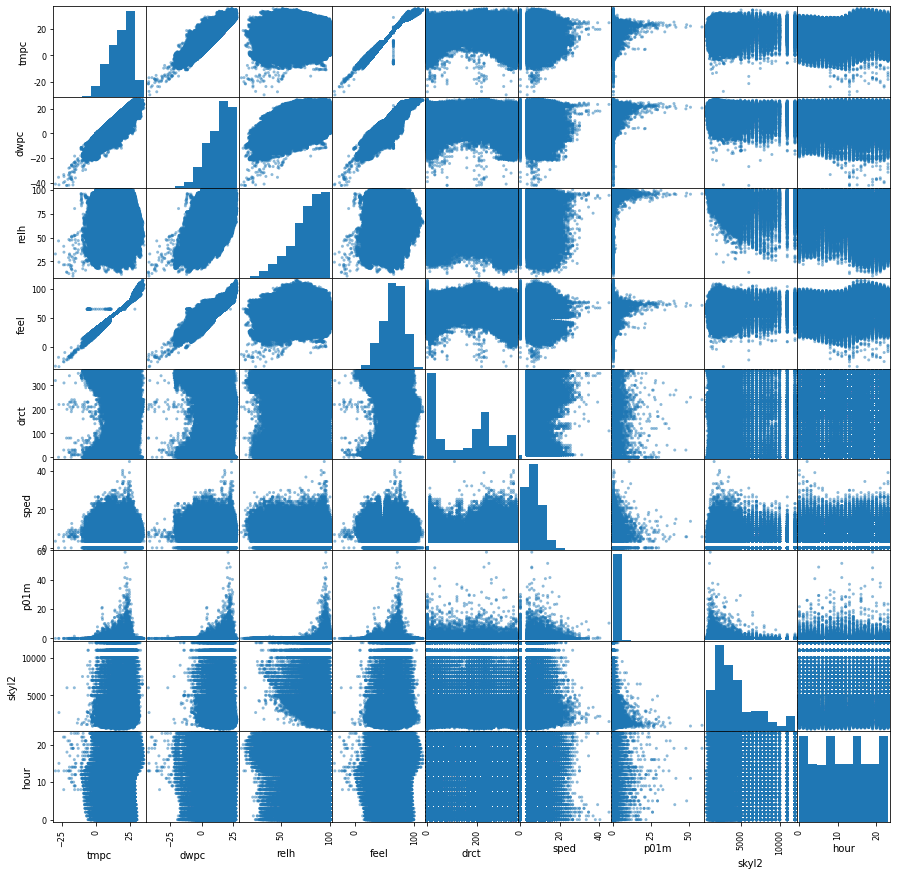

In [ ]:
#SUT Station
scatter_matrix(stationSUT_data, figsize = (15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab9eed0910>,
      dtype=object)

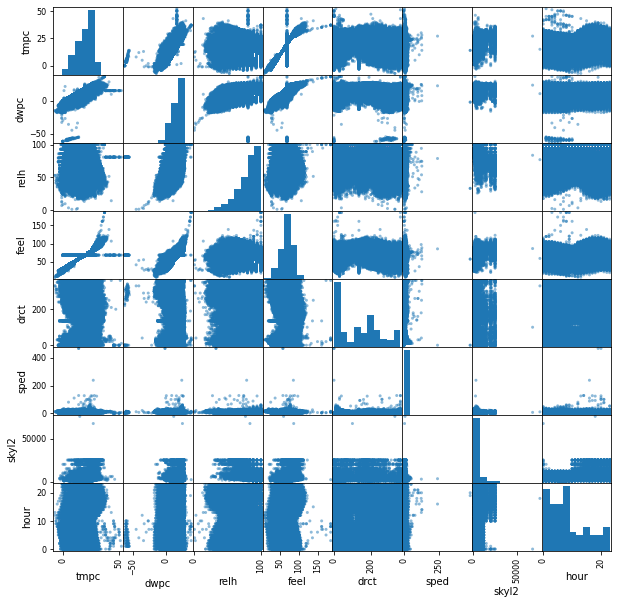

In [ ]:
#HXD Station
scatter_matrix(stationHXD_data, figsize = (10,10))

Correlation Heatmaps:

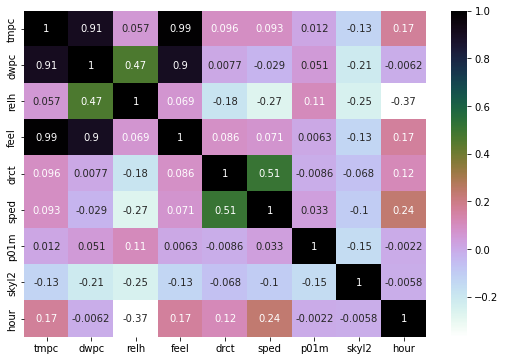

In [ ]:
#SUT Station
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(stationSUT_data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

From the above correlation heatmap of the SUT station data, we can see that:
1.   The variables **"dwpc"** has a high correlation with **"tmpc"** at 0.91 and with **"feel"** at **"0.9"**. The variables **"feel"** and **"tmpc"** are extremely highly correlated at 0.99.
2.   The variables **"relh"** and **"dwpc"** are moderately correlated at 0.47. The variables **"drct"** and **"sped"** are moderately correlated at 0.51.

The above observations are mostly inuitive, as they represent weather phenomena and/or measurements that are known to have a caclulable relationship. However, we may be surprised to learn that wind direction **"drct"** and speed **"sped"** are moderately correlated.


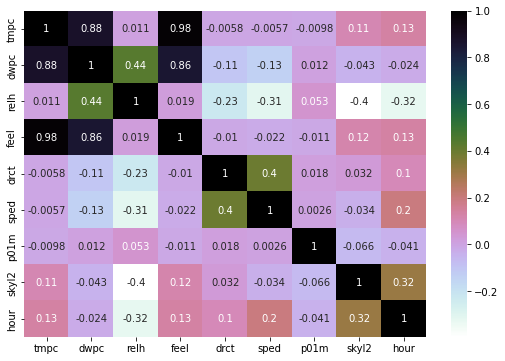

In [ ]:
#HXD Station
plt.figure(figsize=(9,6))
sns.heatmap(stationHXD_data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

From the above correlation heatmap of the HXD station data, we can see that:
1.   The variables **"dwpc"** has a high correlation with **"tmpc"** at 0.88 and with **"feel"** at **"0.86"**. The variables **"feel"** and **"tmpc"** are extremely highly correlated at 0.98.
2.   The variables **"relh"** and **"dwpc"** are moderately correlated at 0.44. The variables **"drct"** and **"sped"** are moderately correlated at 0.4.

The above observations are very similar to those gained from the previous SUT station data correlation heatmap. However, we can also note that in general, the correlations between variables for this HXD dataset are slightly lower.

## Merging Datasets

After cleaning and completing some of the preparation for the buoy and weather station datasets, they will need to be merged into a single dataset for modeling.

In [ ]:
#Save current changed weather station documents to new csv files
stationHXD_updated = stationHXD_data.to_csv("stationHXD_updated.csv")
stationSUT_updated = stationSUT_data.to_csv("stationSUT_updated.csv")

In [ ]:
#Create new dataframes for each weather station based on the updated csv files
stationHXD_updated = pd.read_csv("stationHXD_updated.csv")
stationSUT_updated = pd.read_csv("stationSUT_updated.csv")

In [ ]:
#Merge the two updates weather station dataframes into one station_data dataframe.
station_data = stationHXD_updated.append(stationSUT_updated)

station_data.head(10)

,Unnamed: 0,station,tmpc,dwpc,relh,feel,drct,sped,p01m,skyc1,skyl2,hour,date,mslp
0,0,HXD,8.0,7.0,93.40,46.4,0.0,0.0,0.0,CLR,NaN,0,2013-01-01,NaN
1,1,HXD,7.0,7.0,100.00,44.6,0.0,0.0,NaN,CLR,NaN,1,2013-01-01,NaN
2,2,HXD,6.0,6.0,100.00,42.8,0.0,0.0,NaN,CLR,NaN,1,2013-01-01,NaN
3,3,HXD,8.0,6.0,87.19,46.4,0.0,0.0,0.0,CLR,NaN,1,2013-01-01,NaN
4,4,HXD,6.0,6.0,100.00,42.8,0.0,0.0,NaN,CLR,NaN,1,2013-01-01,NaN
5,5,HXD,6.0,6.0,100.00,42.8,0.0,0.0,NaN,CLR,NaN,2,2013-01-01,NaN
6,6,HXD,6.0,6.0,100.00,42.8,0.0,0.0,NaN,SCT,NaN,2,2013-01-01,NaN
7,7,HXD,7.0,7.0,100.00,44.6,0.0,0.0,NaN,OVC,NaN,2,2013-01-01,NaN
8,8,HXD,7.0,7.0,100.00,44.6,0.0,0.0,NaN,OVC,NaN,3,2013-01-01,NaN
9,9,HXD,8.0,8.0,100.00,46.4,0.0,0.0,NaN,OVC,NaN,3,2013-01-01,NaN


In [ ]:
#Reindex the column names
station_data = station_data.drop("Unnamed: 0", axis = 1)
station_data = station_data.reindex(columns = ["date", "hour", "station",	"tmpc",	"dwpc",	"relh",	"feel",	"drct",	"sped",	"p01i",	"skyc1"])
station_data.head()

,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1
0,2013-01-01,0,HXD,8.0,7.0,93.40,46.4,0.0,0.0,NaN,CLR
1,2013-01-01,1,HXD,7.0,7.0,100.00,44.6,0.0,0.0,NaN,CLR
2,2013-01-01,1,HXD,6.0,6.0,100.00,42.8,0.0,0.0,NaN,CLR
3,2013-01-01,1,HXD,8.0,6.0,87.19,46.4,0.0,0.0,NaN,CLR
4,2013-01-01,1,HXD,6.0,6.0,100.00,42.8,0.0,0.0,NaN,CLR


In [ ]:
#Convert the "date" column to datetime
station_data.date = pd.to_datetime(station_data.date)

In [ ]:
pd.DataFrame(station_data)

,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1
0,2013-01-01,0,HXD,8.00,7.00,93.40,46.4,0.0,0.00,NaN,CLR
1,2013-01-01,1,HXD,7.00,7.00,100.00,44.6,0.0,0.00,NaN,CLR
2,2013-01-01,1,HXD,6.00,6.00,100.00,42.8,0.0,0.00,NaN,CLR
3,2013-01-01,1,HXD,8.00,6.00,87.19,46.4,0.0,0.00,NaN,CLR
4,2013-01-01,1,HXD,6.00,6.00,100.00,42.8,0.0,0.00,NaN,CLR
...,...,...,...,...,...,...,...,...,...,...,...
224989,2021-10-29,22,SUT,19.00,10.28,56.93,66.2,230.0,9.20,NaN,SCT
224990,2021-10-29,22,SUT,19.22,9.61,53.69,66.6,230.0,13.80,NaN,SCT
224991,2021-10-29,23,SUT,19.22,10.22,55.94,66.6,250.0,12.65,NaN,BKN
224992,2021-10-29,23,SUT,19.39,10.22,55.36,66.9,220.0,9.20,NaN,SCT


In [ ]:
#Merge the station_data and buoy_mean dataframes
merged_data = station_data.merge(buoy_mean, how = "inner", left_on = ["date", "hour"], 
                                 right_on = ["date","hh"], left_index = True)

merged_data.head()

,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,hh,WDIR,WSPD,GST,PRES,ATMP,WTMP
53810,2013-01-01,0,HXD,8.0,7.0,93.40,46.40,0.0,0.0,NaN,CLR,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53810,2013-01-01,0,SUT,5.0,2.7,85.07,41.00,0.0,0.0,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53810,2013-01-01,0,SUT,4.6,2.8,88.10,40.28,0.0,0.0,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53810,2013-01-01,0,SUT,4.7,2.7,86.86,40.46,0.0,0.0,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,HXD,7.0,7.0,100.00,44.60,0.0,0.0,NaN,CLR,1,140.0,1.0,7.296079,1017.408303,11.0,21.836225


In [ ]:
#merged_data = merged_data.drop(labels = ["hh", "mm"], axis = 1)

#merged_data.reset_index()
merged_data.head(15)

,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,hh,WDIR,WSPD,GST,PRES,ATMP,WTMP
53810,2013-01-01,0,HXD,8.0,7.0,93.40,46.40,0.0,0.00,NaN,CLR,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53810,2013-01-01,0,SUT,5.0,2.7,85.07,41.00,0.0,0.00,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53810,2013-01-01,0,SUT,4.6,2.8,88.10,40.28,0.0,0.00,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53810,2013-01-01,0,SUT,4.7,2.7,86.86,40.46,0.0,0.00,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,HXD,7.0,7.0,100.00,44.60,0.0,0.00,NaN,CLR,1,140.0,1.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,HXD,6.0,6.0,100.00,42.80,0.0,0.00,NaN,CLR,1,140.0,1.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,HXD,8.0,6.0,87.19,46.40,0.0,0.00,NaN,CLR,1,140.0,1.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,HXD,6.0,6.0,100.00,42.80,0.0,0.00,NaN,CLR,1,140.0,1.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,SUT,4.9,3.2,88.75,40.82,0.0,0.00,NaN,CLR,1,140.0,1.0,7.296079,1017.408303,11.0,21.836225
53811,2013-01-01,1,SUT,5.8,3.6,85.76,42.44,0.0,0.00,NaN,CLR,1,140.0,1.0,7.296079,1017.408303,11.0,21.836225


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276824 entries, 53810 to 8171
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     276824 non-null  datetime64[ns]
 1   hour     276824 non-null  int64         
 2   station  276824 non-null  object        
 3   tmpc     276824 non-null  float64       
 4   dwpc     276824 non-null  float64       
 5   relh     276824 non-null  float64       
 6   feel     276824 non-null  float64       
 7   drct     276824 non-null  float64       
 8   sped     276824 non-null  float64       
 9   p01i     0 non-null       float64       
 10  skyc1    276824 non-null  object        
 11  hh       276824 non-null  int64         
 12  WDIR     276657 non-null  float64       
 13  WSPD     276824 non-null  float64       
 14  GST      276824 non-null  float64       
 15  PRES     276824 non-null  float64       
 16  ATMP     276824 non-null  float64       
 17  WTMP    

In [ ]:
merged_data.to_csv("merged_data.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next we do some slight cleaning of the data to make the data types more accurate.

In [ ]:
headers = [*pd.read_csv('merged_data.csv', nrows=1)]
#print(headers)

data = pd.read_csv("merged_data.csv", usecols = [c for c in headers if c != 'Unnamed: 0'], infer_datetime_format= True)

In [ ]:
data.date = pd.to_datetime(data.date)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276824 entries, 0 to 276823
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     276824 non-null  datetime64[ns]
 1   hour     276824 non-null  int64         
 2   station  276824 non-null  object        
 3   tmpc     276824 non-null  float64       
 4   dwpc     276824 non-null  float64       
 5   relh     276824 non-null  float64       
 6   feel     276824 non-null  float64       
 7   drct     276824 non-null  float64       
 8   sped     276824 non-null  float64       
 9   p01i     0 non-null       float64       
 10  skyc1    276824 non-null  object        
 11  hh       276824 non-null  int64         
 12  WDIR     276657 non-null  float64       
 13  WSPD     276824 non-null  float64       
 14  GST      276824 non-null  float64       
 15  PRES     276824 non-null  float64       
 16  ATMP     276824 non-null  float64       
 17  WTMP     2

In [ ]:
data[data.iloc[:,7] == 240]

,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,hh,WDIR,WSPD,GST,PRES,ATMP,WTMP
20,2013-01-01,4,SUT,10.60,8.30,85.67,51.08,240.0,6.90,NaN,CLR,4,210.0,3.0,7.296079,1017.408303,12.5,21.836225
21,2013-01-01,4,SUT,10.60,8.40,86.25,51.08,240.0,8.05,NaN,CLR,4,210.0,3.0,7.296079,1017.408303,12.5,21.836225
83,2013-01-01,20,SUT,12.00,8.30,78.08,53.60,240.0,4.60,NaN,SCT,20,210.0,3.0,7.296079,1017.408303,13.9,21.836225
103,2013-01-02,2,SUT,12.20,10.50,89.35,53.96,240.0,4.60,NaN,SCT,2,190.0,4.0,7.296079,1017.408303,14.7,21.836225
105,2013-01-02,2,SUT,12.00,10.50,90.53,53.60,240.0,4.60,NaN,OVC,2,190.0,4.0,7.296079,1017.408303,14.7,21.836225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276690,2020-04-22,1,SUT,19.50,16.11,80.77,67.10,240.0,11.50,NaN,CLR,1,257.0,3.9,5.700000,1010.600000,22.5,21.836225
276691,2020-04-22,1,SUT,19.50,16.11,80.77,67.10,240.0,11.50,NaN,CLR,1,257.0,3.9,5.700000,1010.600000,22.5,21.836225
276716,2020-08-13,22,SUT,27.50,24.11,81.79,87.99,240.0,10.35,NaN,CLR,22,233.0,9.8,13.700000,1013.400000,28.4,29.700000
276717,2020-08-13,22,SUT,27.61,24.50,83.17,88.83,240.0,9.20,NaN,SCT,22,233.0,9.8,13.700000,1013.400000,28.4,29.700000


In [ ]:
data["WDIR"].between(150,160)

0         False
1         False
2         False
3         False
4         False
          ...  
276819    False
276820    False
276821    False
276822    False
276823    False
Name: WDIR, Length: 276824, dtype: bool

Based on what Joe Merchant mentioned about wind convergence from the land and sea, we created a varaible to try and measure this convergence using the values Merchant suggested. Unfortunately the results did not seem to rpovide any insights worthwhile so we are probably not going to move foreward with this variable

In [ ]:
data["wconverge"]= (data["WDIR"].between(150,180) & (data["drct"].between(225,270)))

In [ ]:
data["wconverge"].value_counts()

False    275557
True       1267
Name: wconverge, dtype: int64

Another import factor that Joe mentioned was the temperature difference between the sea and the land, so we created a variable called **Temp_dif** to determine that measurement. Hopefully it will provide insights further along when we get into Logistic Regression and Clustering.

In [ ]:
data['Temp_dif'] = data.ATMP - data.tmpc

data.Temp_dif.describe()

count    276824.000000
mean          1.379728
std           3.328656
min         -39.300000
25%          -0.600000
50%           1.100000
75%           3.000000
max          55.200000
Name: Temp_dif, dtype: float64

In [ ]:
#data[data.hour.between(10,16)]

data.head()

,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,hh,WDIR,WSPD,GST,PRES,ATMP,WTMP,wconverge,Temp_dif
0,2013-01-01,0,HXD,8.0,7.0,93.40,46.40,0.0,0.0,NaN,CLR,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,False,3.0
1,2013-01-01,0,SUT,5.0,2.7,85.07,41.00,0.0,0.0,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,False,6.0
2,2013-01-01,0,SUT,4.6,2.8,88.10,40.28,0.0,0.0,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,False,6.4
3,2013-01-01,0,SUT,4.7,2.7,86.86,40.46,0.0,0.0,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,False,6.3
4,2013-01-01,1,HXD,7.0,7.0,100.00,44.60,0.0,0.0,NaN,CLR,1,140.0,1.0,7.296079,1017.408303,11.0,21.836225,False,4.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276824 entries, 0 to 276823
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       276824 non-null  datetime64[ns]
 1   hour       276824 non-null  int64         
 2   station    276824 non-null  object        
 3   tmpc       276824 non-null  float64       
 4   dwpc       276824 non-null  float64       
 5   relh       276824 non-null  float64       
 6   feel       276824 non-null  float64       
 7   drct       276824 non-null  float64       
 8   sped       276824 non-null  float64       
 9   p01i       0 non-null       float64       
 10  skyc1      276824 non-null  object        
 11  hh         276824 non-null  int64         
 12  WDIR       276657 non-null  float64       
 13  WSPD       276824 non-null  float64       
 14  GST        276824 non-null  float64       
 15  PRES       276824 non-null  float64       
 16  ATMP       276824 no

In [ ]:
data.loc[:, :"WTMP"].hist(figsize = (30,30))

Using sns we created a correlation matrix to view how each of the variables are correlated after the merging of both datasets.

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

Since some of the varaibles such as the temperature are skewed on some occasions we introduce the standard scaler to scale the variables.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

To view the difference the scaled data makes, we plotted a scatter matrix of each of the variables. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f65aad950>,
      dtype=object)

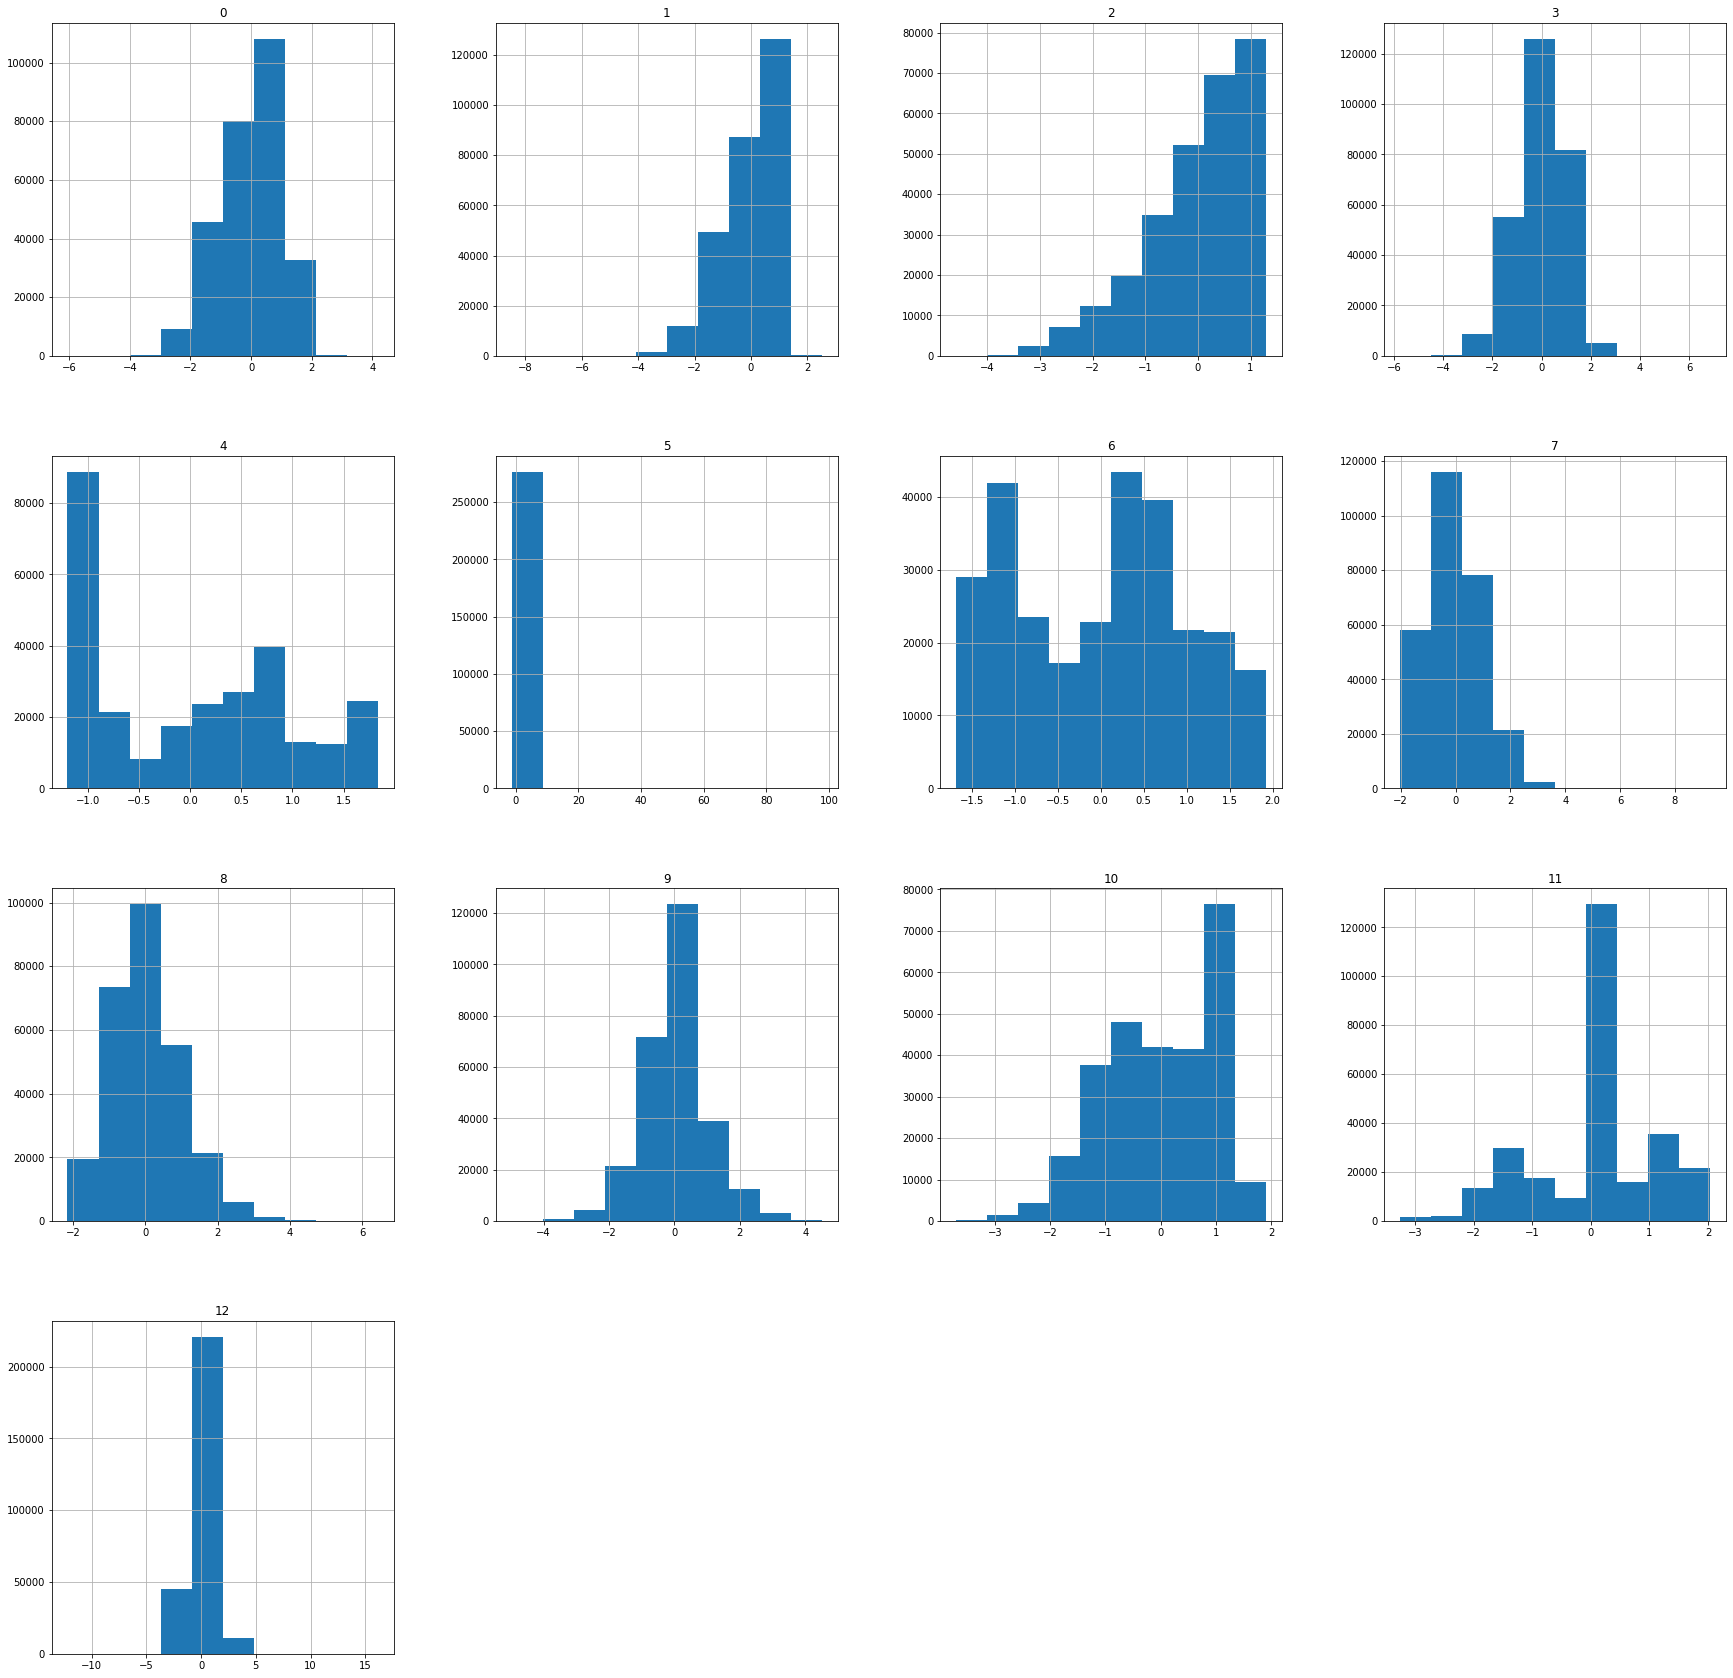

In [ ]:
columns = ["tmpc", "dwpc", "relh", "feel", "drct", "sped", "WDIR", "WSPD", "GST", "PRES", "ATMP", "WTMP", "Temp_dif"]

scaled_data = pd.DataFrame(
    scaler.fit_transform(data[["tmpc", 
                               "dwpc", "relh", "feel", "drct", "sped", "WDIR", 
                               "WSPD", "GST", "PRES", "ATMP", "WTMP", "Temp_dif"]]))

scaled_data.hist(figsize = (30,30))

In [ ]:
.loc[:, :"WTMP"].hist(figsize = (30,30))

We also performed a Normalizer to the data to see how that affects the data and once again perform a scatter plot matrix.

In [ ]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

In [ ]:
normal_data = pd.DataFrame(
    norm.fit_transform(data[["tmpc", 
                               "dwpc", "relh", "feel", "drct", "sped", "WDIR", 
                               "WSPD", "GST", "PRES", "ATMP", "WTMP", "Temp_dif"]]))

normal_data.hist(figsize = (25,25))

ValueError: ignored

In [ ]:
data_day = data[data["hour"].between(10,16)]

data_day.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hour,68653.0,12.956375,2.018553,10.00,11.00,13.000000,15.00,16.00
tmpc,68653.0,18.195364,8.517704,-29.90,12.00,19.300000,25.10,45.00
dwpc,68653.0,13.612268,9.295922,-60.00,7.11,16.000000,21.50,35.00
relh,68653.0,76.498496,16.930424,3.27,65.83,78.760000,90.68,100.00
feel,68653.0,65.408355,18.622210,-33.65,53.60,66.900000,78.14,161.07
drct,68653.0,153.321765,126.441116,0.00,20.00,170.000000,250.00,360.00
sped,68653.0,6.905399,4.514687,0.00,4.60,6.900000,9.20,127.65
p01i,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hh,68653.0,12.956375,2.018553,10.00,11.00,13.000000,15.00,16.00
WDIR,68614.0,168.661920,112.254555,0.00,51.00,191.000000,265.00,360.00


In [ ]:
max_temp = max(data_day.groupby("date").tmpc)
min_temp = min(data_day.groupby("date").tmpc)

max_btemp = max(data_day.groupby("date").ATMP)
min_btemp = min(data_day.groupby("date").ATMP)

max_temp

(Timestamp('2020-12-31 00:00:00'), 271508    17.00
 271509    16.00
 271510    17.61
 271511    17.50
 271512    17.50
 271513    14.00
 271514    17.50
 271515    17.72
 271516    17.89
 271517    15.00
 271518    17.78
 271519    18.50
 271520    18.50
 271521    15.00
 271522    18.50
 271523    18.61
 271524    19.00
 271525    17.00
 271526    19.00
 271527    19.00
 271528    20.00
 271529    20.00
 271530    20.39
 271531    20.50
 271532    19.50
 271533    19.00
 271534    20.00
 271535    20.39
 271536    20.22
 Name: tmpc, dtype: float64)

In [ ]:
min(data_day.Temp_dif)

-32.4

In [ ]:
data_day.Temp_dif

47        3.10
48        3.10
49        2.50
50        2.40
51        2.10
          ... 
276816    2.71
276817    0.71
276818    1.09
276819    1.92
276820    1.92
Name: Temp_dif, Length: 68653, dtype: float64

In [ ]:
converge = data_day[data_day["wconverge"] == True]

print(max(converge.Temp_dif))
print(min(converge.Temp_dif))
print(np.mean(converge.Temp_dif))

13.41
-5.399999999999999
-0.9471460384503048


In order to calculate seabreeze, we need another measure of pressure closer to the shore and the weather stations, so we included another dataset with the intention of only keeping pressure to be used later.

In [ ]:
#Reading in the original Data and parsing the data to format the dat in year-month-day format 
data = pd.read_csv("merged_data.csv")
air_pres = pd.read_csv("AirPressure.csv", parse_dates = {"date" : ["#YY","MM","DD"]})
air_pres

,date,hh,PRES,ATMP,WTMP
0,2013-01-01,0,1023.6,7.9,999.0
1,2013-01-01,0,1023.7,7.8,999.0
2,2013-01-01,0,1023.7,7.8,999.0
3,2013-01-01,0,1023.6,8.0,999.0
4,2013-01-01,0,1023.5,8.5,999.0
...,...,...,...,...,...
693103,2020-12-31,23,1021.8,18.5,8.7
693104,2020-12-31,23,1021.9,17.8,8.7
693105,2020-12-31,23,1021.7,16.8,8.7
693106,2020-12-31,23,1021.7,17.8,8.7


Replacing the missing values (here coded as 9999, 999, and 999 respectively).
Seeing we have significant missing data in all numeric columns

In [ ]:
air_pres["PRES"].replace({9999.0:np.nan}, inplace=True)
air_pres["ATMP"].replace({999.0:np.nan}, inplace=True)
air_pres["WTMP"].replace({999.0:np.nan}, inplace=True)
air_pres.isnull().sum()

date        0
hh          0
PRES     9873
ATMP    16810
WTMP    61489
dtype: int64

Here we are eliminating all columns except for date, hour, and Pressure. We are only keeping pressure to calculate the sea breeze which we will discuss further later

In [ ]:
air_pres = air_pres.drop(["ATMP", "WTMP"], axis=1)


In [ ]:
#import impute library
from sklearn.impute import SimpleImputer
#impute the mean into the missing data
apm = air_pres.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
air_pres.iloc[:, 2:] = mean_imputer.fit_transform(apm.iloc[:, 2:])


In [ ]:
#Here we see we have no more missing values
print(apm.isnull().sum())


date       0
hh         0
PRES    9873
dtype: int64


In [ ]:
#Making this dataframe to datetime so we can merge on the date
data.date = pd.to_datetime(data.date)
pd.DataFrame(data)

,Unnamed: 0,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,hh,WDIR,WSPD,GST,PRES,ATMP,WTMP
0,53810,2013-01-01,0,HXD,8.00,7.00,93.40,46.40,0.0,0.00,NaN,CLR,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
1,53810,2013-01-01,0,SUT,5.00,2.70,85.07,41.00,0.0,0.00,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
2,53810,2013-01-01,0,SUT,4.60,2.80,88.10,40.28,0.0,0.00,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
3,53810,2013-01-01,0,SUT,4.70,2.70,86.86,40.46,0.0,0.00,NaN,SCT,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225
4,53811,2013-01-01,1,HXD,7.00,7.00,100.00,44.60,0.0,0.00,NaN,CLR,1,140.0,1.0,7.296079,1017.408303,11.0,21.836225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276819,7967,2020-12-16,10,SUT,7.78,6.00,88.51,39.82,20.0,13.80,NaN,OVC,10,342.0,10.6,14.700000,1014.600000,9.7,15.300000
276820,7967,2020-12-16,10,SUT,7.78,6.00,88.51,41.36,20.0,9.20,NaN,OVC,10,342.0,10.6,14.700000,1014.600000,9.7,15.300000
276821,8171,2020-12-24,22,SUT,18.72,17.61,93.26,65.70,170.0,12.65,NaN,SCT,22,203.0,8.9,14.400000,1005.200000,17.5,14.300000
276822,8171,2020-12-24,22,SUT,18.78,17.61,92.93,65.80,160.0,10.35,NaN,SCT,22,203.0,8.9,14.400000,1005.200000,17.5,14.300000


Merging our merged dataset with the new buoy pressure data, resulting in a new Pres_y variable to correspond with our original PRES_x data

In [ ]:
sea_breeze_data = data.merge(apm, how = "inner", left_on = ["date", "hour"], 
                                 right_on = ["date","hh"], left_index = True)
sea_breeze_data

,Unnamed: 0,date,hour,station,tmpc,dwpc,relh,feel,drct,sped,p01i,skyc1,hh_x,WDIR,WSPD,GST,PRES_x,ATMP,WTMP,hh_y,PRES_y
0,53810,2013-01-01,0,HXD,8.00,7.00,93.40,46.4,0.0,0.0,NaN,CLR,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,0,1023.6
1,53810,2013-01-01,0,HXD,8.00,7.00,93.40,46.4,0.0,0.0,NaN,CLR,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,0,1023.7
2,53810,2013-01-01,0,HXD,8.00,7.00,93.40,46.4,0.0,0.0,NaN,CLR,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,0,1023.7
3,53810,2013-01-01,0,HXD,8.00,7.00,93.40,46.4,0.0,0.0,NaN,CLR,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,0,1023.6
4,53810,2013-01-01,0,HXD,8.00,7.00,93.40,46.4,0.0,0.0,NaN,CLR,0,120.0,2.0,7.296079,1017.408303,11.0,21.836225,0,1023.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691413,8171,2020-12-24,22,SUT,18.72,17.61,93.26,65.7,170.0,13.8,NaN,BKN,22,203.0,8.9,14.400000,1005.200000,17.5,14.300000,22,1006.3
691414,8171,2020-12-24,22,SUT,18.72,17.61,93.26,65.7,170.0,13.8,NaN,BKN,22,203.0,8.9,14.400000,1005.200000,17.5,14.300000,22,1006.1
691415,8171,2020-12-24,22,SUT,18.72,17.61,93.26,65.7,170.0,13.8,NaN,BKN,22,203.0,8.9,14.400000,1005.200000,17.5,14.300000,22,1005.9
691416,8171,2020-12-24,22,SUT,18.72,17.61,93.26,65.7,170.0,13.8,NaN,BKN,22,203.0,8.9,14.400000,1005.200000,17.5,14.300000,22,1005.7


### Calculation of Sea Breeze

Using multiple formulas found to calculate air density (), we created an estimated calculation for the condusiveness of a sea breeze at any given time. this originates from the report on sea breeze calculation that estimates that conduciveness of sea breeze can be calculated using air density *h*, overwater temperature *T*, and the gravitational constant. this variable is known as **SBI** and a value under 5 is an indication that weather factors are conducive to produce a sea breeze. We are still working on perfecting these variables and are not quite sure how accurate the final results are yet based on the description of **SBI**.

In [ ]:
Saturated_vapor_pressure = 6.1078 * (10**((7.5*sea_breeze_data.tmpc)/(sea_breeze_data.tmpc + 237.3)))
vapor_pressure = Saturated_vapor_pressure * sea_breeze_data.relh
dry_pressure = sea_breeze_data.PRES_y - vapor_pressure

air_density = dry_pressure/(287.058*(sea_breeze_data.tmpc+273.15)) + vapor_pressure/(461.495*(sea_breeze_data.tmpc+273.15))

SBI = 19.6*air_density/sea_breeze_data.ATMP

print(sea_breeze_data.ATMP.describe())
print(SBI.describe())

count    2.736905e+06
mean     1.990971e+01
std      6.957807e+00
min     -5.900000e+00
25%      1.440000e+01
50%      2.020000e+01
75%      2.650000e+01
max      3.320000e+01
Name: ATMP, dtype: float64
count    2.694717e+06
mean              inf
std               NaN
min     -2.461653e+00
25%      1.885590e-04
50%      3.765057e-03
75%      9.651919e-03
max               inf
dtype: float64
